Nan Removal 
Data Distribution (histogram)
Normalize
Correlation!!


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_sydney = pd.read_csv('Sydney_Data.csv')
df_tasmania = pd.read_csv('Tasmania_Data.csv')
df_queensland = pd.read_csv('Perth_Data.csv')
df_victoria = pd.read_csv('Adelaide_Data.csv')

labels = [f"X{i+1}" for i in range(16)] + [f"Y{i+1}" for i in range(16)]  + [f"P{i+1}" for i in range(16)] + ["Total Power"]

df_places_list = [df_sydney,df_tasmania,df_queensland,df_victoria]

for df in df_places_list:
    df.columns = labels
    before = len(df)
    df = df.dropna()
    after = len(df)
    print(f"{before} rows before removal, {after} rows after removal due to NaN values")
    
df_sydney = df_sydney.dropna()
df_sydney.describe()

71999 rows before removal, 71999 rows after removal due to NaN values
71999 rows before removal, 71999 rows after removal due to NaN values
71999 rows before removal, 71999 rows after removal due to NaN values
71998 rows before removal, 71998 rows after removal due to NaN values


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Total Power
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,324.133374,318.477362,248.652631,273.801529,364.119683,270.716619,268.092122,251.208070,257.471430,263.834583,...,92460.884080,92400.975646,92359.920807,93528.646327,92532.953265,92866.755979,94515.600559,92124.749321,92812.610497,1.486229e+06
std,201.042089,200.451621,207.727700,202.495956,165.251348,221.883331,210.126467,191.411037,193.920646,203.081690,...,6351.798805,7314.158973,6617.069863,7108.760851,6631.067652,7179.122445,6828.225439,6978.018276,7128.182893,2.308365e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,67649.721100,67935.571500,67961.501700,67930.722800,68171.326100,68113.928900,68294.961800,66233.342800,64609.768500,1.361962e+06
25%,137.455000,131.145850,43.281500,63.622900,248.586900,38.901650,57.463400,79.830000,71.289250,48.943750,...,87871.385400,86957.379300,87504.869750,88247.377750,87321.966400,87602.912550,90045.083400,86835.587700,87872.906700,1.470987e+06
50%,355.491700,355.171500,201.883500,274.830100,388.361200,250.374600,233.010400,213.817000,239.241300,265.394800,...,92484.468800,91374.359800,92113.541800,93441.473900,93066.785000,91552.374600,94274.492400,91202.941700,91453.286100,1.487282e+06
75%,524.002100,518.243450,462.505600,468.287000,515.557000,511.209300,485.903150,422.632000,432.784500,457.985850,...,97638.110300,97719.256750,97502.161300,98653.938950,97534.290600,98739.756650,99668.769550,97512.504000,98362.924200,1.504180e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,110026.753900,109417.620000,109240.703000,109668.448700,109185.088800,109898.206000,109237.388800,109087.161400,109253.606800,1.536347e+06


In [4]:
df_sydney.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Total Power
0,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,...,83029.8436,91483.7433,93748.1139,99467.6415,95935.6597,84254.7876,93786.3095,94499.4790,88941.7152,1489888.502
1,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,...,91309.1752,107598.5159,101897.2685,100876.0477,79350.0981,100060.2964,92733.9494,100646.9126,83394.8729,1495035.934
2,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,...,92083.6042,103182.5412,80688.8463,92306.4190,106440.6778,102118.7041,99295.1266,96503.3818,77942.2947,1459841.498
3,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,...,85602.1738,98370.5585,97148.3728,95775.0777,80723.5930,95865.7812,88525.7698,94546.5417,85021.1027,1475765.923
4,446.6611,421.0366,493.1895,566.0000,516.3773,566.0000,566.0000,474.8170,566.0000,0.0000,...,89796.6317,106234.3463,86528.7448,97221.3296,80957.7402,95689.2702,95590.0073,85799.2132,88227.3054,1486388.580


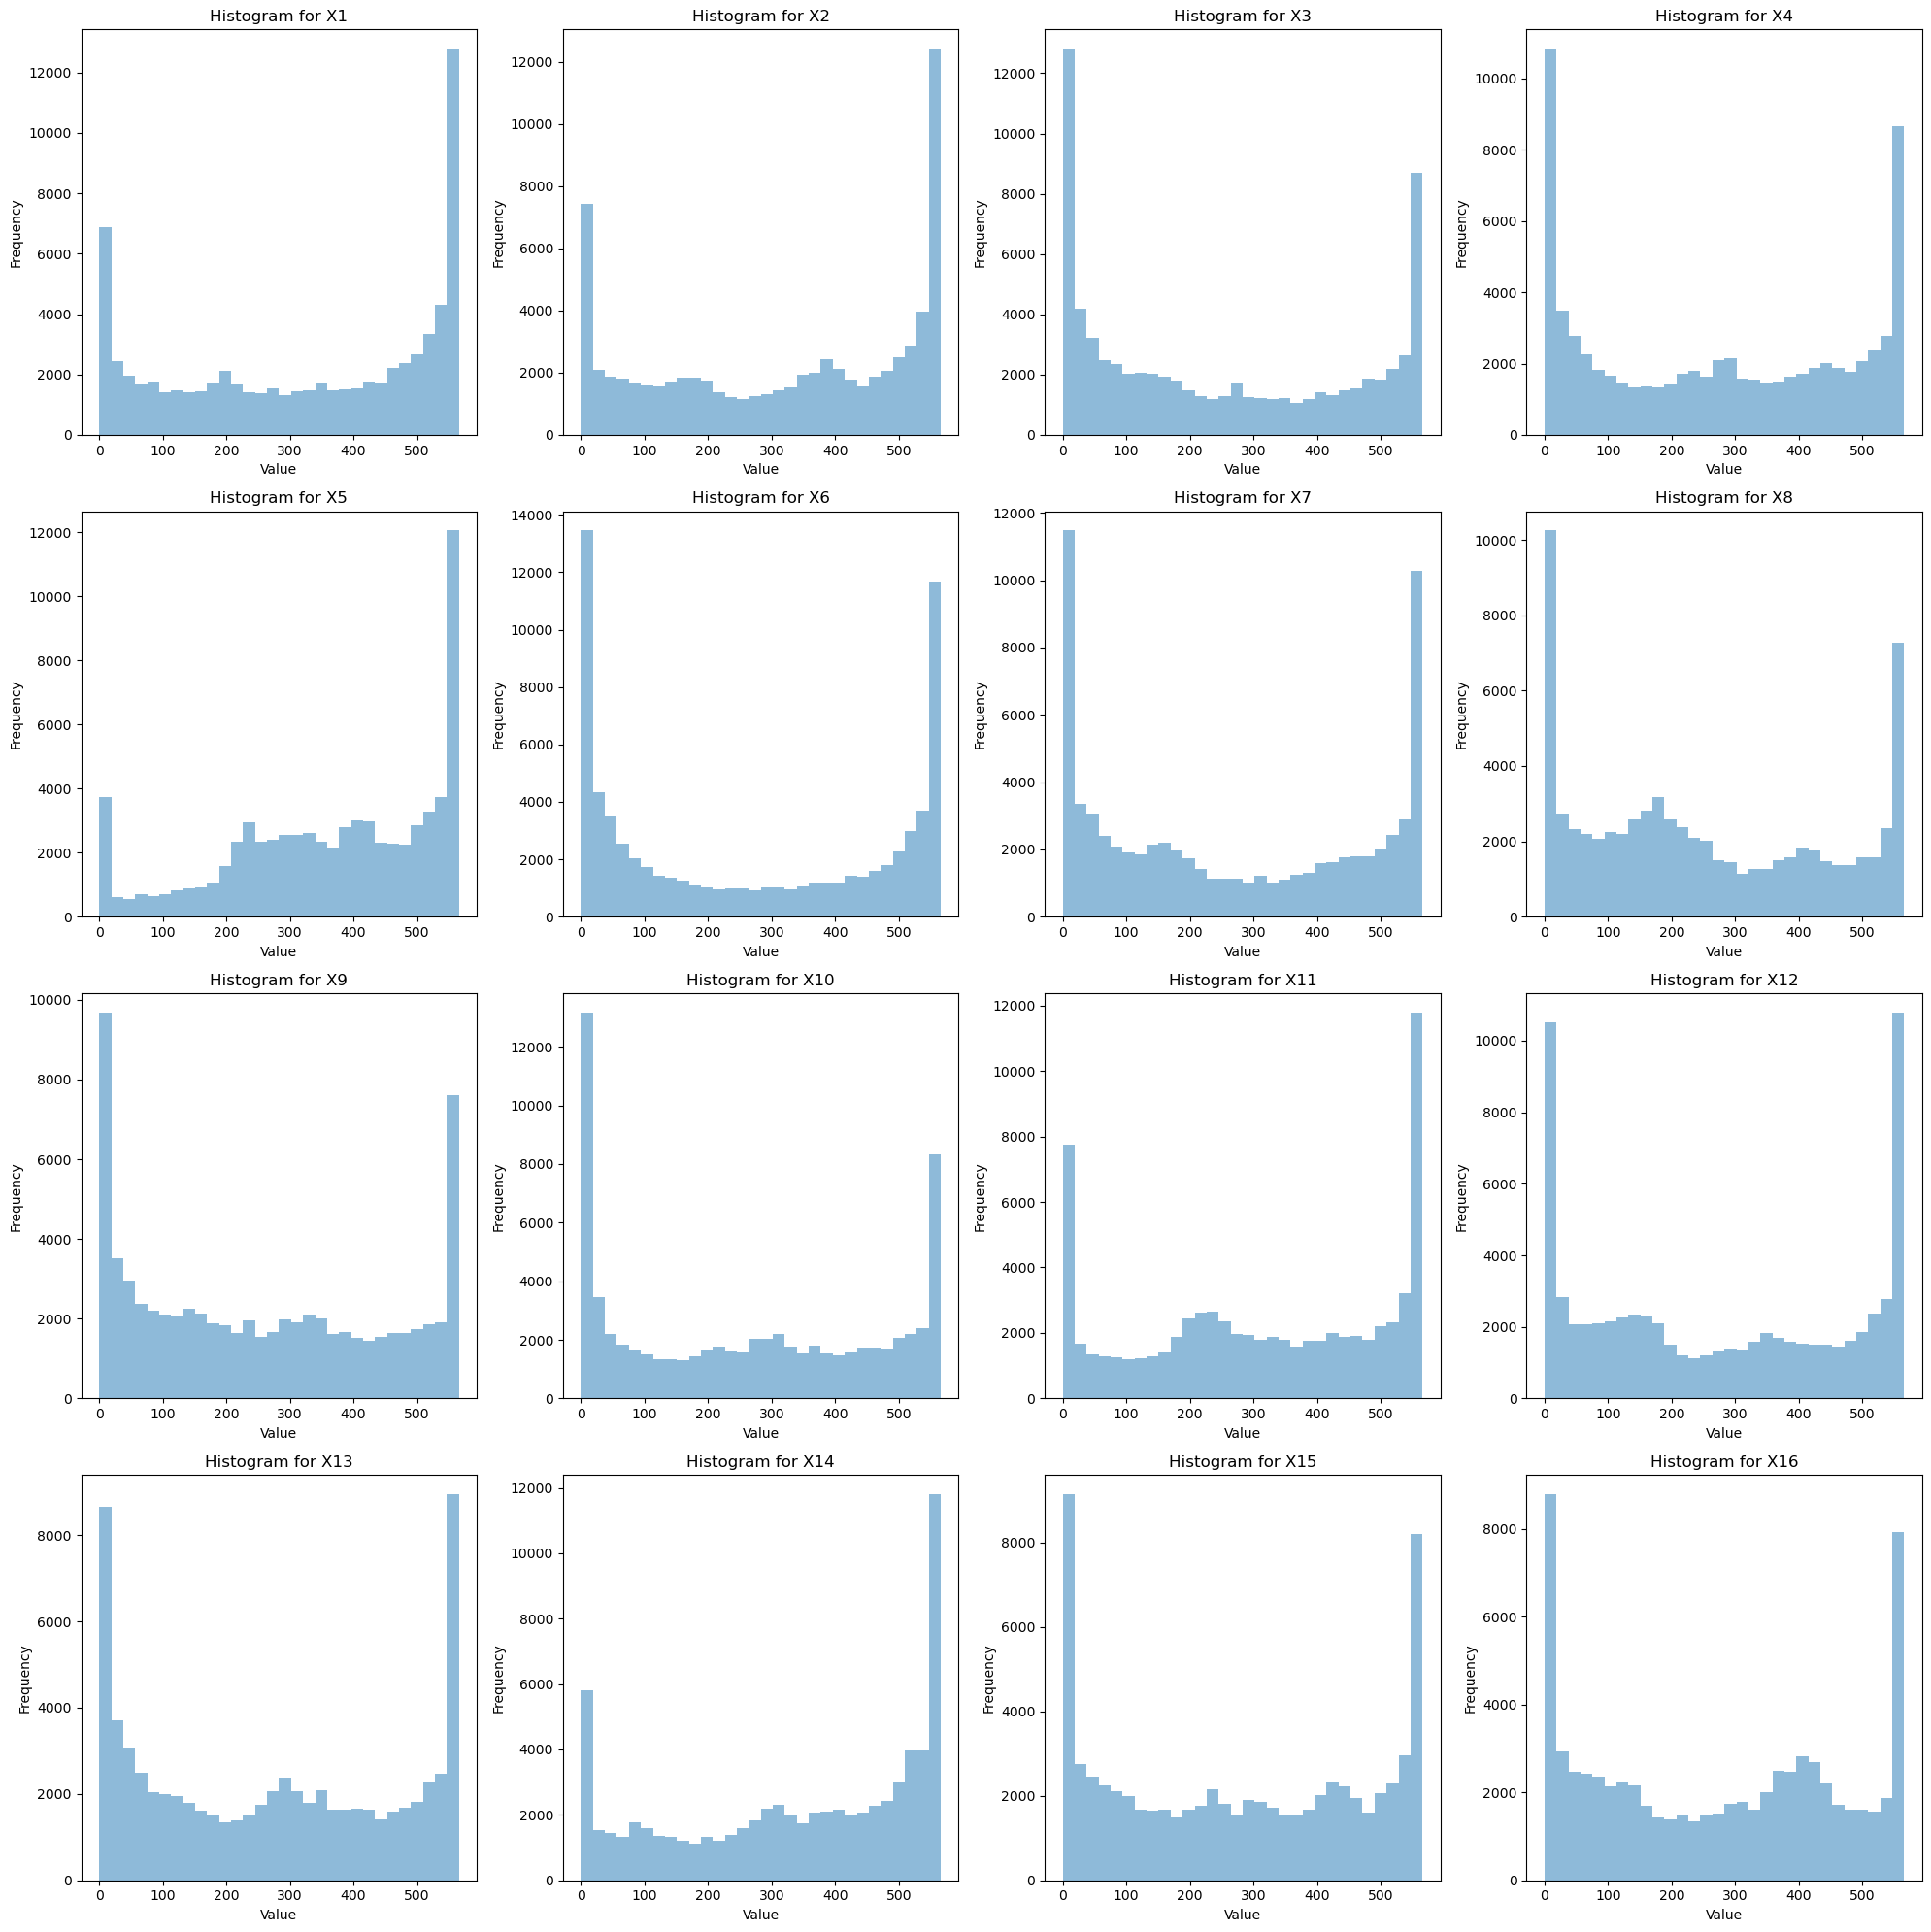

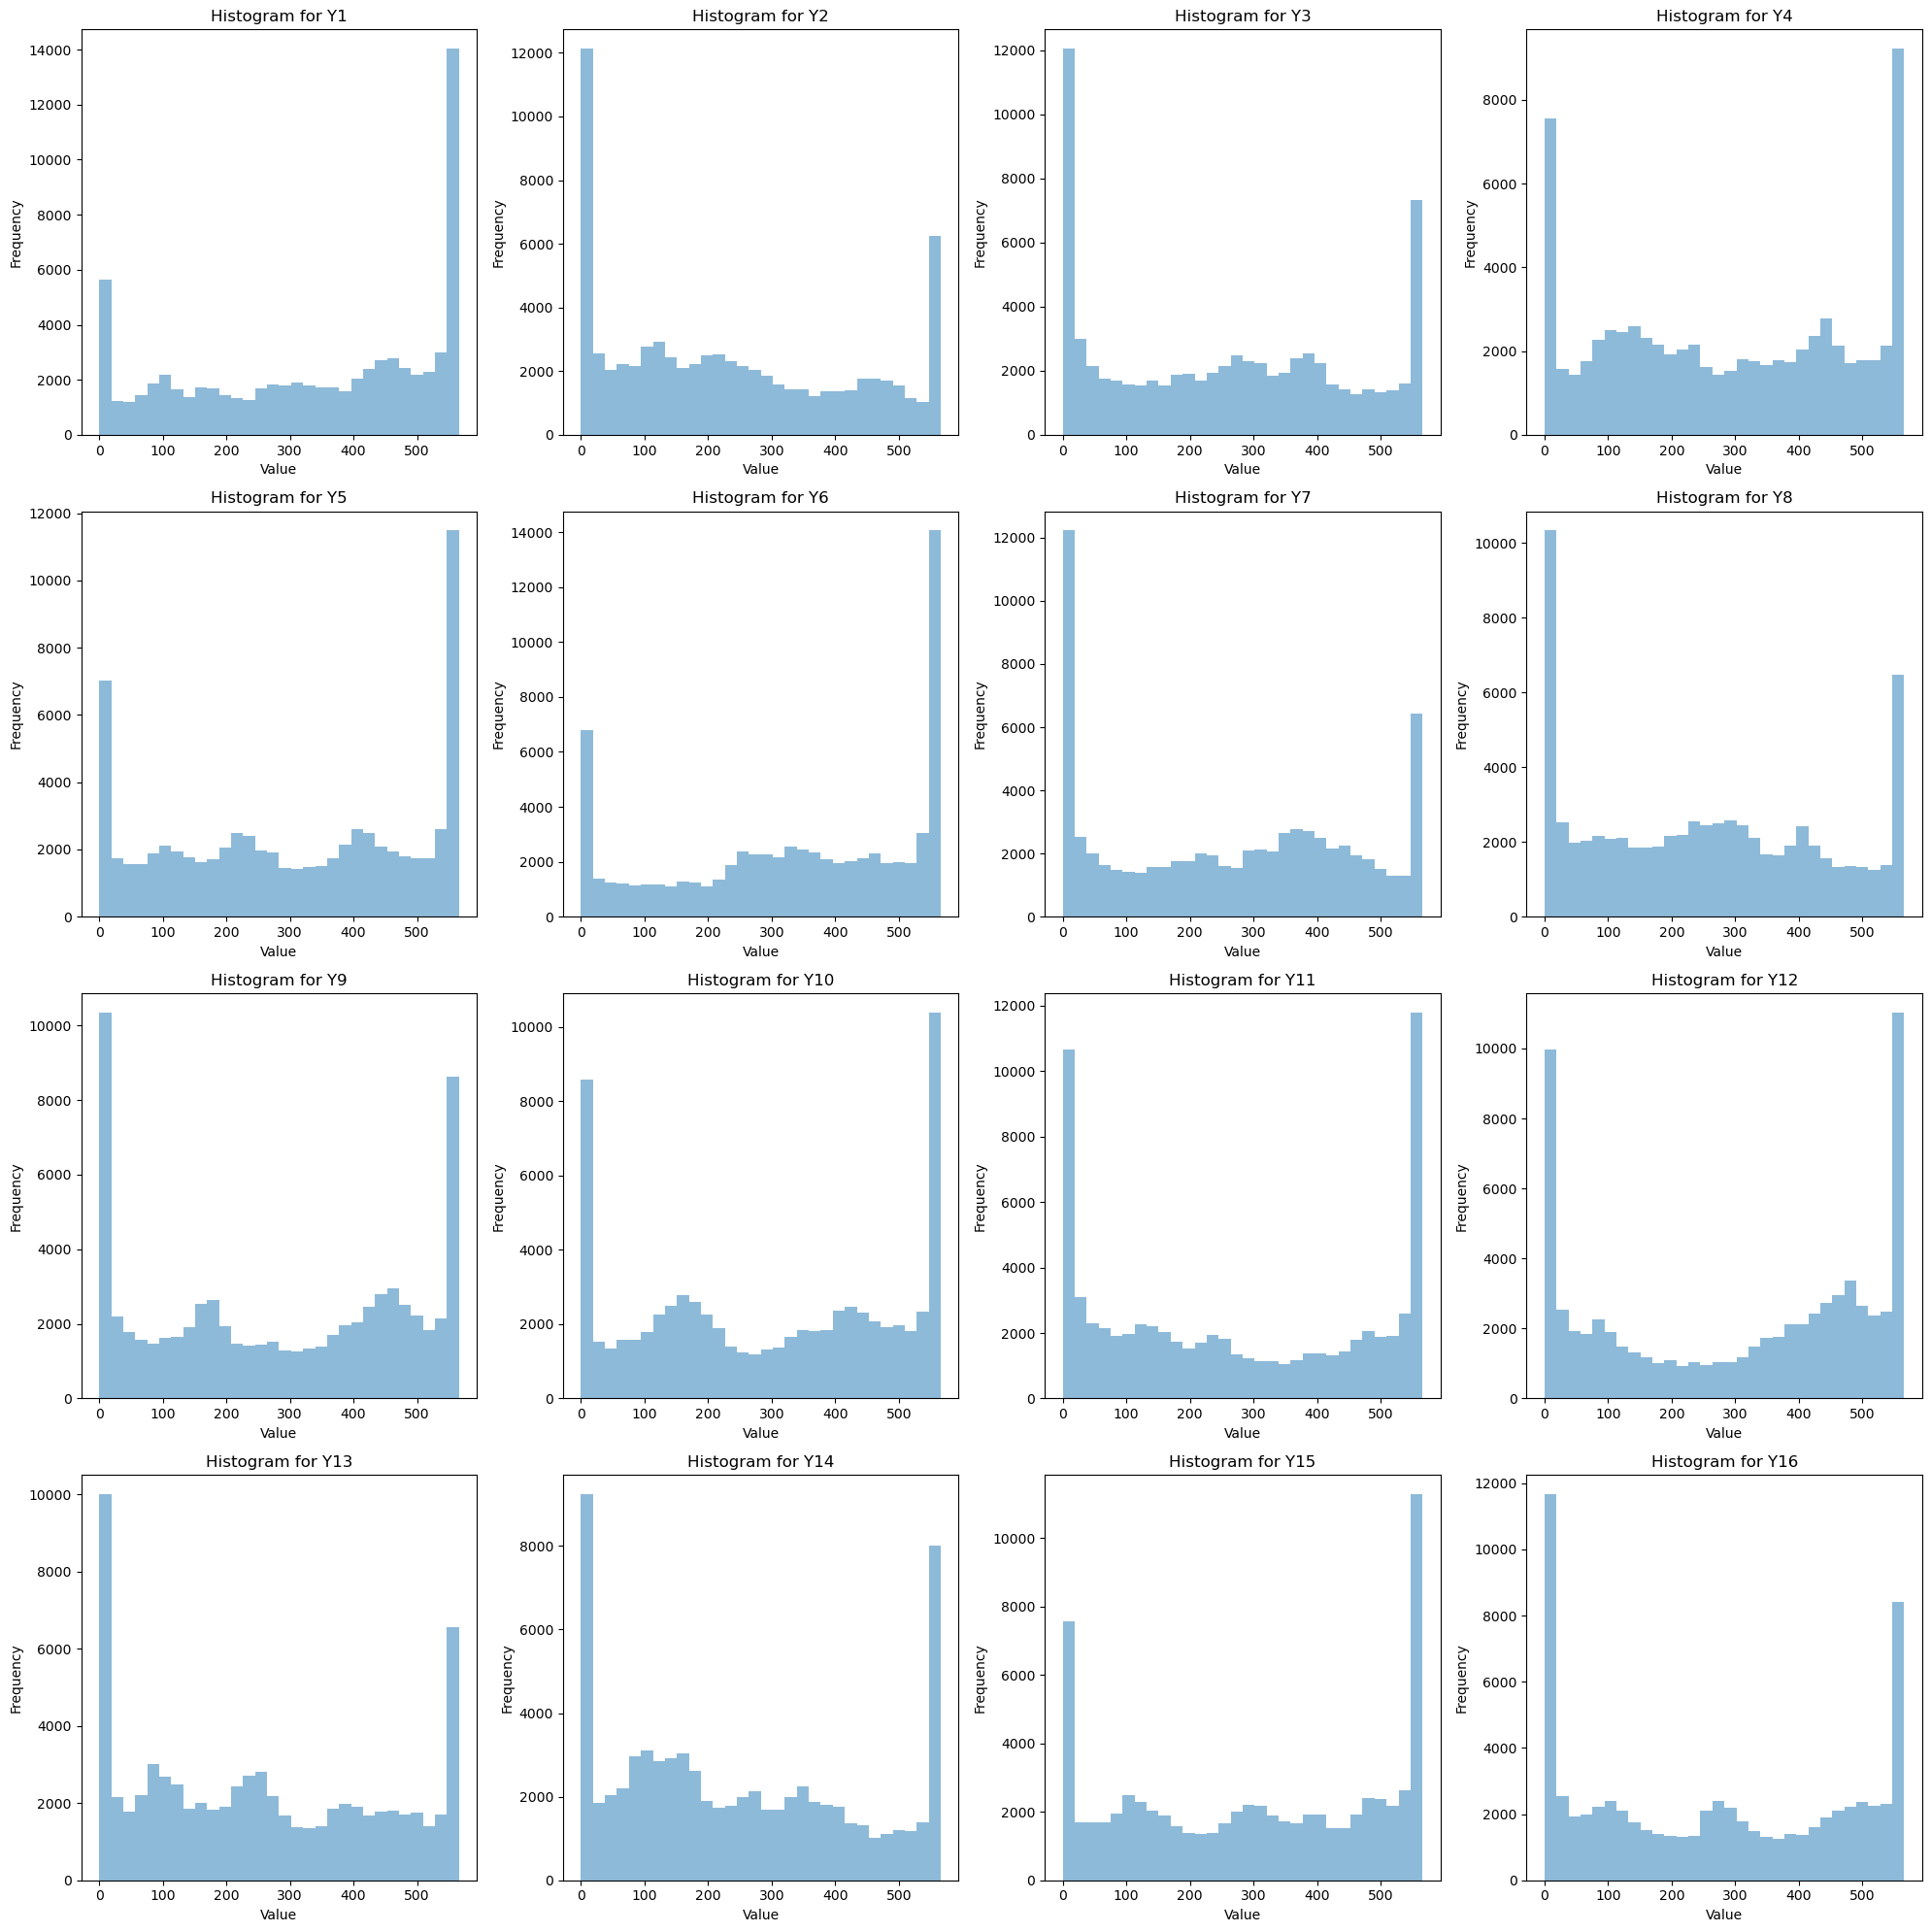

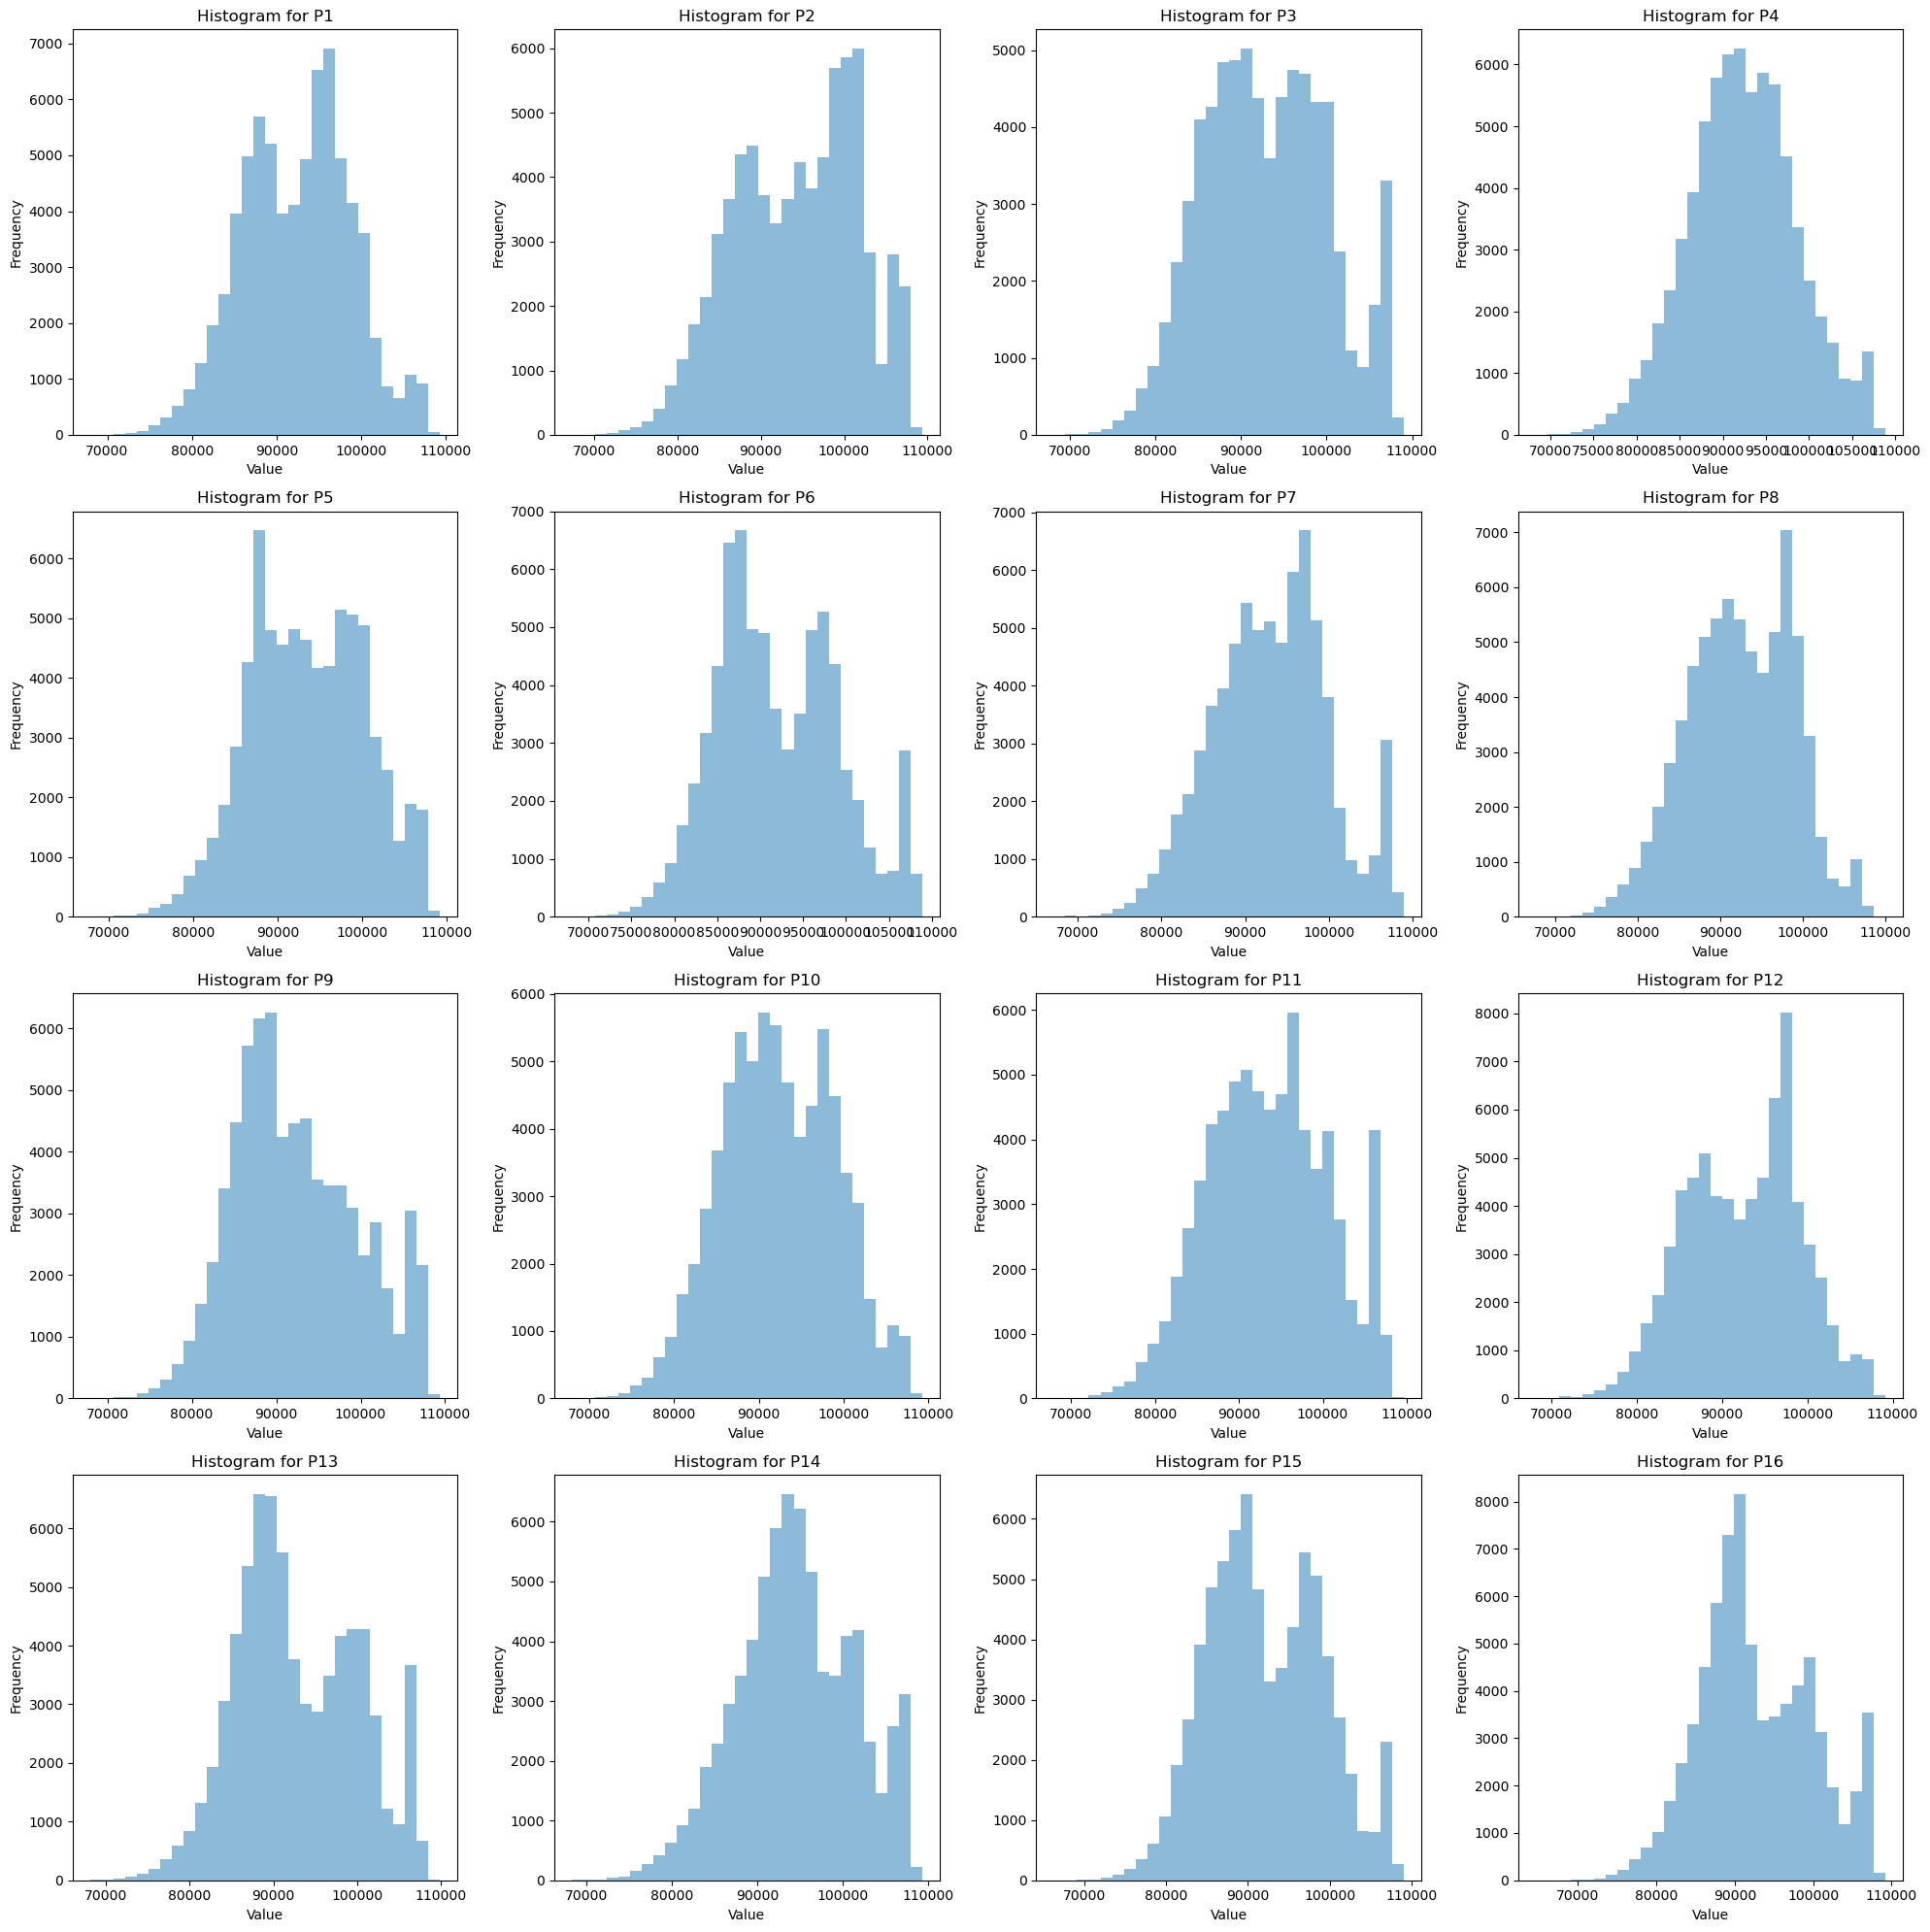

<Figure size 640x480 with 0 Axes>

In [8]:
# Histogram dla kolumn X
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    df_sydney[f"X{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for X{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create histograms for each Y column
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    df_sydney[f"Y{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for Y{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create histograms for each P column
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    df_sydney[f"P{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for P{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

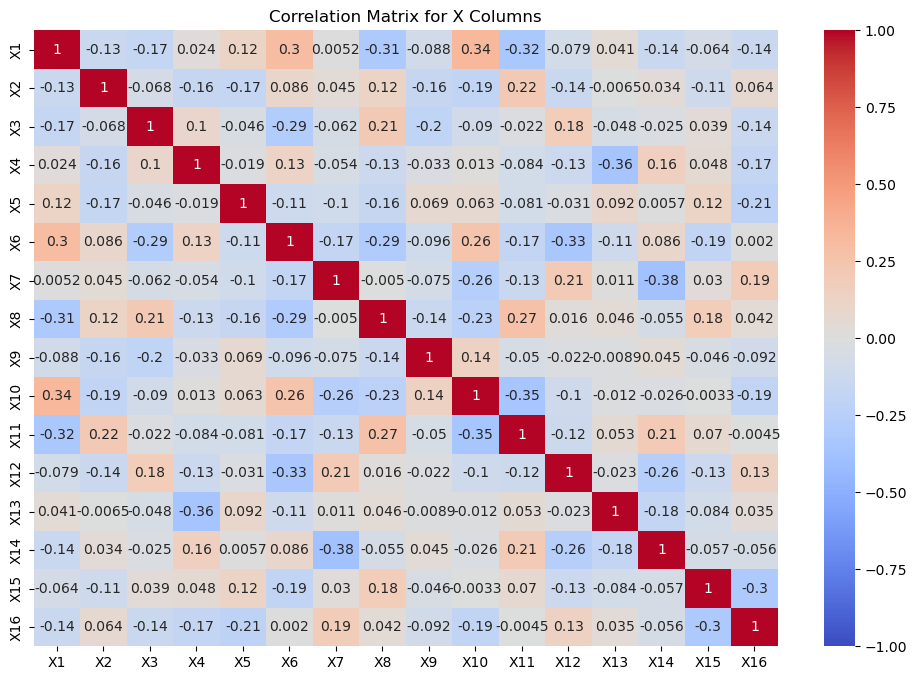

In [24]:
# Calculate correlation matrices
corr_X = df_sydney[[f"X{i+1}" for i in range(16)]].corr()
corr_Y = df_sydney[[f"Y{i+1}" for i in range(16)]].corr()
corr_P = df_sydney[[f"P{i+1}" for i in range(16)]].corr()

# Plot correlation heatmap for X columns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_X, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for X Columns')
plt.show()

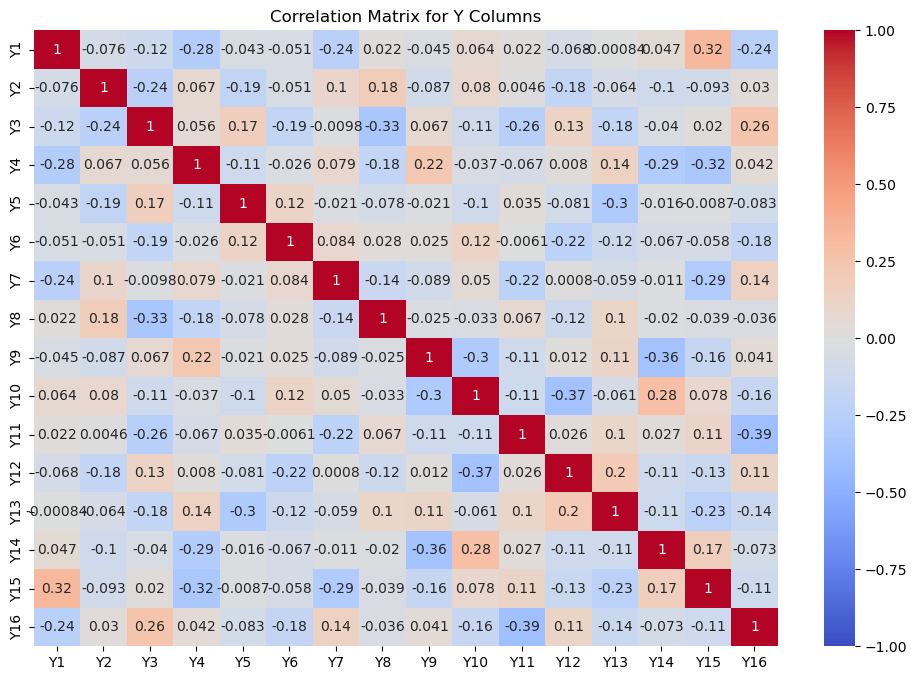

In [25]:
# Plot correlation heatmap for Y columns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_Y, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Y Columns')
plt.show()

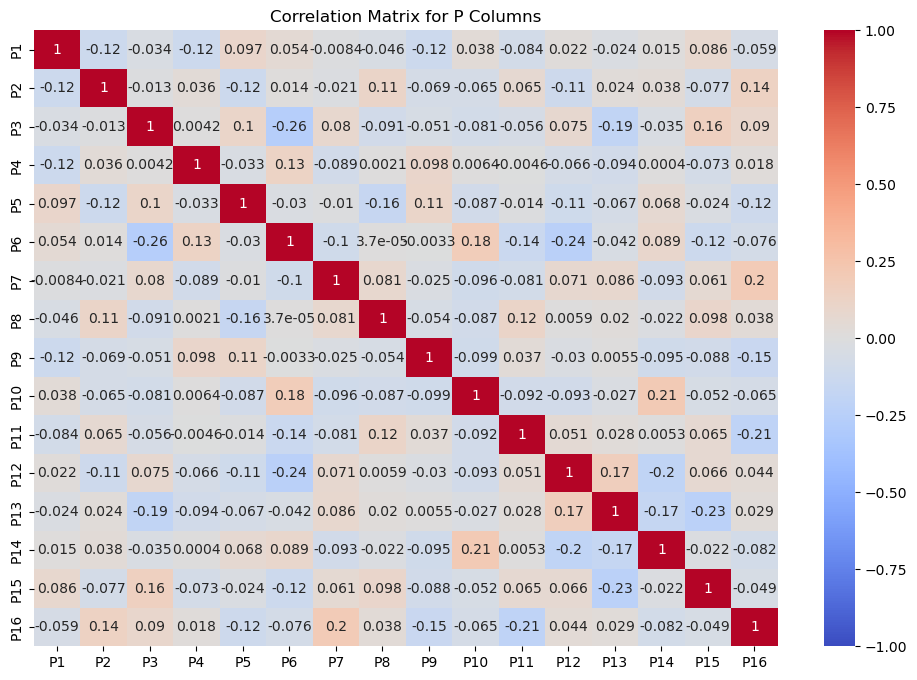

In [26]:
# Plot correlation heatmap for P columns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_P, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for P Columns')
plt.show()

In [38]:
for i in range(len(df_places_list)):
    scaler = MinMaxScaler()
    df_places_list[i][df_places_list[i].columns] = scaler.fit_transform(df_places_list[i][df_places_list[i].columns])

# Display the head of the first DataFrame to verify
df_sydney = df_places_list[0]
df_sydney.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Total Power
0,0.884219,0.492314,0.083757,0.737395,0.974750,0.708798,0.000000,0.285826,0.650449,0.081246,...,0.362935,0.567671,0.624688,0.755597,0.676952,0.386290,0.622614,0.659594,0.545024,0.733586
1,0.904154,0.184520,1.000000,0.672099,0.611058,0.000000,0.159998,0.012880,1.000000,1.000000,...,0.558308,0.956147,0.822103,0.789342,0.272561,0.764555,0.596911,0.803046,0.420777,0.763104
2,0.034804,0.382399,0.627731,0.119815,0.916476,0.127486,0.393628,0.395626,1.000000,0.552027,...,0.576583,0.849692,0.308323,0.584021,0.933086,0.813817,0.757165,0.706356,0.298642,0.561284
3,0.000000,0.000000,0.429933,0.000000,1.000000,0.000000,0.350685,0.000000,1.000000,1.000000,...,0.423636,0.733691,0.707060,0.667127,0.306050,0.664170,0.494128,0.660693,0.457204,0.652601
4,0.789154,0.743881,0.871360,1.000000,0.912327,1.000000,1.000000,0.838899,1.000000,0.000000,...,0.522616,0.923261,0.449797,0.701778,0.311759,0.659945,0.666669,0.456572,0.529021,0.713516


In [51]:

X = df_sydney[[f"X{i+1}" for i in range(16)] + [f"Y{i+1}" for i in range(16)]].values
def perform_3d_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Linear Regression: MSE = {mse}")
    return model

# Perform linear regression for P1, P2, and P3
y_P1 = df_sydney["P1"].values
y_P2 = df_sydney["P2"].values
y_P3 = df_sydney["P3"].values

model_P1 = perform_3d_linear_regression(X, y_P1)
model_P2 = perform_3d_linear_regression(X, y_P2)
model_P3 = perform_3d_linear_regression(X, y_P3)

Linear Regression: MSE = 0.00948559162243952
Linear Regression: MSE = 0.008859324640270746
Linear Regression: MSE = 0.010134994322912741


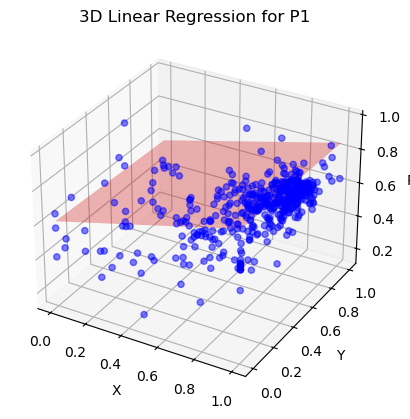

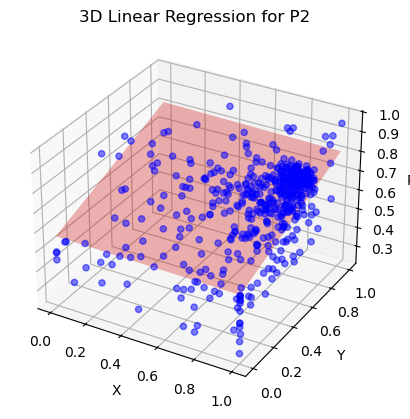

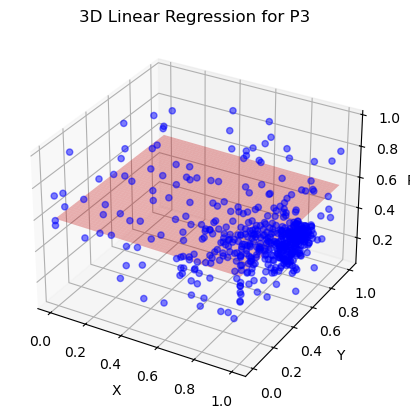

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot 3D scatter and regression plane with axis labels
def plot_3d_regression(X, y, model, title, xlabel, ylabel, zlabel, num_points=10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with reduced number of points
    ax.scatter(X[:num_points, 0], X[:num_points, 1], y[:num_points], color='blue', marker='o', alpha=0.5)

    # Create a meshgrid for the plane with reduced number of points
    x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), num_points),
                                 np.linspace(X[:, 1].min(), X[:, 1].max(), num_points))

    # Create a full feature set with zeros for the other features
    X_full = np.zeros((x_surf.ravel().shape[0], X.shape[1]))
    X_full[:, 0] = x_surf.ravel()
    X_full[:, 1] = y_surf.ravel()

    z_surf = model.predict(X_full).reshape(x_surf.shape)

    # Plot the regression plane
    ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    plt.show()

# Plot for P1
plot_3d_regression(X, y_P1, model_P1, '3D Linear Regression for P1', 'X', 'Y', 'P1', num_points=500)

# Plot for P2
plot_3d_regression(X, y_P2, model_P2, '3D Linear Regression for P2', 'X', 'Y', 'P2', num_points=500)

# Plot for P3
plot_3d_regression(X, y_P3, model_P3, '3D Linear Regression for P3', 'X', 'Y', 'P3', num_points=500)

In [ ]:
# X = df_sydney.X1.values.reshape(-1,1)
# Y = df_sydney.Y1.values.reshape(-1,1)
# p = df_sydney.P1.values.reshape(-1)
# 
# X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
